# astroLuSt

In [1]:
import astroLuSt as al

## Time_stuff

In [34]:
import time     #just loaded to simulate a task running

#create tasks
task = al.Time_stuff("some task")
task2 = al.Time_stuff("another task")

#time running-time of two intertwined tasks
task.start_task()
time.sleep(2)   #run some task
task2.start_task()
time.sleep(3)   #run some other task
task.end_task()
task2.end_task()


--> Started some task at time 2021-10-25 20:49:27.639771
--> Started another task at time 2021-10-25 20:49:29.647254
--> Time needed for some task: 0:00:05.013851
--> Finished some task at time 2021-10-25 20:49:32.653622
--> Time needed for another task: 0:00:03.006368
--> Finished another task at time 2021-10-25 20:49:32.653622


## Table_LuSt

Create Table_LuSt object and populate with a header and two rows

In [35]:
header = ["C1", "C2", "C3", "C4"]
separators = ["||", "|", " ", "|"]
alignments = ["l", "c", "c", "r"]
row1 = ["t11", 246, 2.45, 1E6]
row2 = ["t21", 1, 26.45, 1.2E-3]
row12 = [row1, row2]
fstring12 = 2*[["%10s", "%8d", "%8.3f", "%12.1e"]]    #formatstrings for row1 and row2
newsects = [False, "-"]
table = al.Table_LuSt(header=header,            #header
                      rows=row12,               #rows (content of table)
                      formatstrings=fstring12,  #formatting of rows
                      separators=separators,    #separators to use between columns
                      newsections=newsects,     #when to start new sections
                      alignments=alignments     #how to align the contents
                      )
# table.header = header   #use to change/set a header

print(table)            #prints out table objects and its attributes
table.print_table()     #prints out table including separator



Table_LuSt(
header = ['C1', 'C2', 'C3', 'C4'],
rows = [['t11', 246, 2.45, 1000000.0], ['t21', 1, 26.45, 0.0012]],
formatstrings = [['%10s', '%8d', '%8.3f', '%12.1e'], ['%10s', '%8d', '%8.3f', '%12.1e']],
separators = ['||', '|', ' ', '|'],
alignments = ['l', 'c', 'c', 'r']newsections = [False, '-'],
)
 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
----------------------------------------------


In [24]:
#rownumbers
table.print_table(save=False,               #option to save the template to a file (enter filename to save)
                  writingtype="w",          #option to define "writing style"
                  print_it=True,            #print table in bash or not
                  hide_rownumbers=False     #hide rownumber column or not
                  )

print("")
#no rownumbers
table.print_table(save=False,               #option to save the template to a file (enter filename to save)
                  writingtype="w",          #option to define "writing style"
                  print_it=True,            #print table in bash or not
                  hide_rownumbers=True      #hide rownumber column or not
                  )

 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   4       2.45  |  8.2000e-02
 4 ||t41       |   8      82.450 |     1.2e-02
----------------------------------------------

C1        |   C2       C3   |          C4
t11       |  246     2.450  |     1.0e+06
-----------------------------------------
t21       |   1      26.450 |     1.2e-03
t31       |   4       2.45  |  8.2000e-02
t41       |   8      82.450 |     1.2e-02
-----------------------------------------


Add another row with correspoinding formatstring to the table

In [20]:
row3 = ["t31", 4, 2.45, 8.2E-2]                     #row 3
fstring3 = ["%10s", "%8d", "%8.2f", "%12.4e"]        #formatstring for row3
table.add_row(row=row3,           #row to add
              fstring=fstring3,   #formatting for added row
              new_sect="="        #wether to start a new section and which separator to use
            )
print(table)            #prints out table objects and its attributes

table.print_table()


Table_LuSt(
header = ['C1', 'C2', 'C3', 'C4'],
rows = [['t11', 246, 2.45, 1000000.0], ['t21', 1, 26.45, 0.0012], ['t31', 4, 2.45, 0.082]],
formatstrings = [['%10s', '%8d', '%8.3f', '%12.1e'], ['%10s', '%8d', '%8.3f', '%12.1e'], ['%10s', '%8d', '%8.2f', '%12.4e']],
separators = ['||', '|', ' ', '|'],
alignments = ['l', 'c', 'c', 'r']newsections = [False, '-', '='],
)
 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   4       2.45  |  8.2000e-02
----------------------------------------------


Add another row without formatstring set.
This will set the formatstring automatically to the one of the last current entries.

In [21]:
row4 = ["t41", 8, 82.45, 1.2E-2]

table.add_row(row4)

table.print_table()


 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   4       2.45  |  8.2000e-02
 4 ||t41       |   8      82.450 |     1.2e-02
----------------------------------------------


Access only header or only rows of the table

In [22]:
# table.print_table()
all_header = table.print_header(print_it=True,           #print in bash or not
                                hide_rownumbers=False    #show or hide rownumber column
                                )    #prints out header
all_rows = table.print_rows(print_it=True,           #print in bash or not
                            hide_rownumbers=False    #show or hide rownumber column
                            )      #prints out rows

 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   4       2.45  |  8.2000e-02
 4 ||t41       |   8      82.450 |     1.2e-02


Create a template which can be copied into a .tex file and will produce a table

In [ ]:
table.latex_template(save=False,            #option to save the template to a file (enter filename to save)
                     writingtype="w",       #option to define "writing style"
                     print_it=True,         #print table in bash or not
                     print_latex=True,      #print latex_template in bash or not
                     hide_rownumbers=False  #hide rownumber column or not
                     )    #prints latex template of table

 # ||C1        |   C2       C3   |          C4
 1 ||t11       |  246     2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1      26.450 |     1.2e-03
 3 ||t31       |   42    1.1e+00 |        5.76
----------------------------------------------
\begin{table}[]
    \centering
    \begin{tabular}{c||l|c c|r}
        \hline\hline
        \#  & C1         &    C2 & C3    &           C4 \\ 
        \hline
         1  & t11        &   246 & 2.450   &      1.0e+06 \\ 
        \hline
         2  & t21        &    1 & 26.450  &      1.2e-03 \\ 
        \hline\hline
         3  & t31        &    42 & 1.1e+00  &         5.76 \\ 
        \hline
    \end{tabular}
    \caption{ADD YOUR CAPTION}
    \label{tab:ADD SOME LABEL}
\end{table}


## Plot_LuSt

### plot_ax

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
--> Started plot_ax at time 2021-10-25 18:05:15.303602

---------------------------------------
position: 211, curve number: 1
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------


---------------------------------------
position: 224, curve number: 0
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------


---------------------------------------
position: 223, curve number: 0
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------

--> Time needed for plot_ax: 0

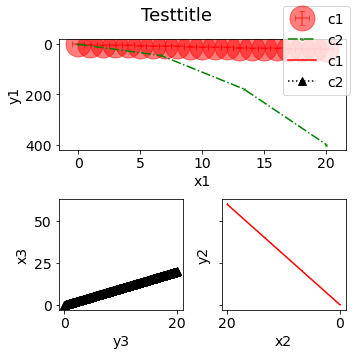

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xi = np.linspace(0,20,21)

#subplot1
xvals_sp1 = [xi,xi]
yvals_sp1 = [xi,xi**2]
colors_sp1 = ["r","g"]
markers_sp1 = [".","x"]
markersizes_sp1 = [50,2]
labels_sp1 = ["c1", "c2"]
linestyles_sp1 = ["","-."]
alphas_sp1 = [0.5,1]
smooths_sp1 = [False, True]
smoothdegrees_sp1 = [3,3]
smoothresolutions_sp1 = [100,4]
xerrs_sp1 = [[0.5]*len(xi), [1]*len(xi)]
yerrs_sp1 = [[0.5]*len(xi), [1]*len(xi)]
capsizes_sp1 = [3,5]
errcolors_sp1 = ["r","g"]
position_sp1 = 211
zorders_sp1 = [1,2]
invert_yaxis_sp1 = True
invert_xaxis_sp1 = False
xaxlab_sp1 = "x1"
yaxlab_sp1 = "y1"

#subplot2
xvals_sp2 = [xi]
yvals_sp2 = [xi*3]
colors_sp2 = ["r"]
markers_sp2 = [","]
markersizes_sp2 = [12]
labels_sp2 = ["c1"]
linestyles_sp2 = ["-"]
alphas_sp2 = [1]
smooths_sp2 = [True]
smoothdegrees_sp2 = [3]
smoothresolutions_sp2 = [4]
xerrs_sp2 = [[2]*len(xi)]
yerrs_sp2 = [[2]*len(xi)]
capsizes_sp2 = [3]
errcolors_sp2 = ["b"]
position_sp2 = 224
zorders_sp2 = [1]
invert_yaxis_sp2 = False
invert_xaxis_sp2 = True
xaxlab_sp2 = "x2"
yaxlab_sp2 = "y2"

#subplot3
xvals_sp3 = [xi]
yvals_sp3 = [xi]
colors_sp3 = ["k"]
markers_sp3 = ["^"]
markersizes_sp3 = [8]
labels_sp3 = ["c2"]
linestyles_sp3 = [":"]
alphas_sp3 = [1]
smooths_sp3 = [True]
smoothdegrees_sp3 = [2]
smoothresolutions_sp3 = [300]
xerrs_sp3 = [None]
yerrs_sp3 = [None]
capsizes_sp3 = [None]
errcolors_sp3 = ["c"]
position_sp3 = 223
zorders_sp3 = [1]
invert_yaxis_sp3 = False
invert_xaxis_sp3 = False
xaxlab_sp3 = "y3"
yaxlab_sp3 = "x3"

#define variables for each subplot/graph
xvals = [xvals_sp1, xvals_sp2, xvals_sp3]
yvals = [yvals_sp1, yvals_sp2, yvals_sp3]
colors= [colors_sp1, colors_sp2, colors_sp3]
markers = [markers_sp1, markers_sp2, markers_sp3]
markersizes = [markersizes_sp1, markersizes_sp2, markersizes_sp3]
labels = [labels_sp1, labels_sp2, labels_sp3] 
linestyles = [linestyles_sp1, linestyles_sp2, linestyles_sp3] 
alphas = [alphas_sp1, alphas_sp2, alphas_sp3] 
smooths = [smooths_sp1, smooths_sp2, smooths_sp3] 
smoothdegrees = [smoothdegrees_sp1, smoothdegrees_sp2, smoothdegrees_sp3] 
smoothresolutions = [smoothresolutions_sp1, smoothresolutions_sp2, smoothresolutions_sp3] 
xerrs = [xerrs_sp1, xerrs_sp2, xerrs_sp3] 
yerrs = [yerrs_sp1, yerrs_sp2, yerrs_sp3] 
capsizes = [capsizes_sp1, capsizes_sp2, capsizes_sp3] 
errcolors = [errcolors_sp1, errcolors_sp2, errcolors_sp3] 
positions = [position_sp1, position_sp2, position_sp3]
zorders = [zorders_sp1, zorders_sp2, zorders_sp3] 
invert_xaxis = [invert_xaxis_sp1, invert_xaxis_sp2, invert_xaxis_sp3]
invert_yaxis = [invert_yaxis_sp1, invert_yaxis_sp2, invert_yaxis_sp3]
xaxlabs = [xaxlab_sp1, xaxlab_sp2, xaxlab_sp3] 
yaxlabs = [yaxlab_sp1, yaxlab_sp2, yaxlab_sp3] 

suptitle="Testtitle"
num = "Testplot"

axlegend = False
figlegend = True
figsize = (5,5)
fontsize = 16

import astroLuSt as al
fig, axs = al.Plot_LuSt.plot_ax(xvals=xvals, yvals=yvals,
                                colors=colors, markers=markers, markersizes=markersizes, labels=labels, linestyles=linestyles, alphas=alphas,
                                smooths=smooths, smoothdegrees=smoothdegrees, smoothresolutions=smoothresolutions,
                                xerrs=xerrs, yerrs=yerrs, capsizes=capsizes, errcolors=errcolors,
                                positions=positions, zorders=zorders,
                                invert_yaxis=invert_yaxis, invert_xaxis=invert_xaxis,
                                xlabs=xaxlabs, ylabs=yaxlabs, suptitle=suptitle, num=num,
                                axlegend=axlegend, figlegend=figlegend, figsize=figsize, fontsize=fontsize,
                                timeit=True, verbose=True)


#use to share axis
axs[1].get_shared_y_axes().join(axs[1],axs[2])
axs[1].set_yticklabels([])
plt.tight_layout()
plt.show()


### hexcolor_extract

--> Started hexcolor_extract at time 2021-10-25 20:49:59.539392


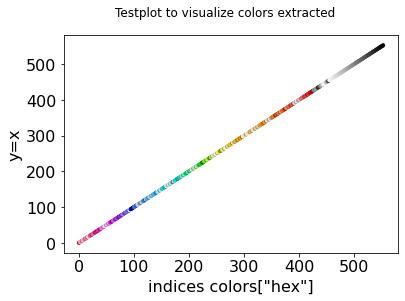

--> Time needed for hexcolor_extract: 0:00:00.249220
--> Finished hexcolor_extract at time 2021-10-25 20:49:59.788612


In [36]:
colors = al.Plot_LuSt.hexcolor_extract(testplot=True, timeit=True)

### color_generator

In [2]:
ncolors = 100
colors = al.Plot_LuSt.color_generator(ncolors, testplot=True, timeit=True)

NotImplementedError: Not implemented yet, but on the TODO-list ;)

## Data_LuSt

### TODO
update to have example for all functions

### linspace_def
 way of producing high resolutions in some areas while having lower resolution in others

--> Started linspace_def at time 2021-10-25 20:43:43.383187

--------------------------------------------------
 verbose, linspace_def:
 --> Number of iterations         : 70
 --> Shape of combined_linspace   : 100
 --> Desired shape                : 100
 --> Range of linspace            : [-100, 100]
--> Number of cut datapoints: 2
--------------------------------------------------



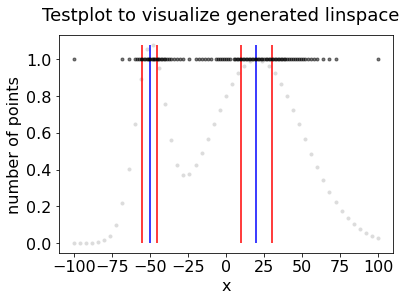

--> Time needed for linspace_def: 0:00:00.349049
--> Finished linspace_def at time 2021-10-25 20:43:43.732236


In [23]:
import numpy as np
import astroLuSt as al

input_array = np.linspace(-100,100,1000)
centers = [-50, 20]
widths = [5, 10]
nintervals=50
nbins=100
spreads=[2,3]
linspace = al.Data_LuSt.linspace_def(centers=centers, widths=widths, linspace_range=input_array, nintervals=nintervals, nbins=nbins, spreads=spreads, go_exact=True, testplot=True, verbose=True, timeit=True)


## Example timeseries analysis
start by creating some periodic timeseries including noise

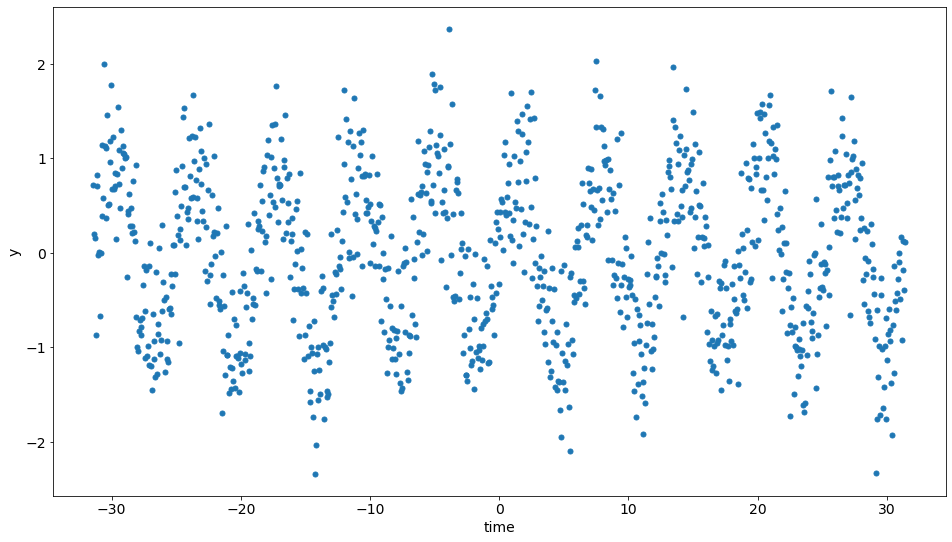

In [27]:
import astroLuSt as al
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(-10*np.pi, 10*np.pi, 1000)
noise = np.random.normal(size=time.shape)
y = np.sin(time) + 0.5*noise

fig, axs = al.Plot_LuSt.plot_ax(xvals=[[time]], yvals=[[y]], xlabs=["time"])
plt.show()

### fold

Fold dataset on corresponding period ($2\pi$) and get into phase-space

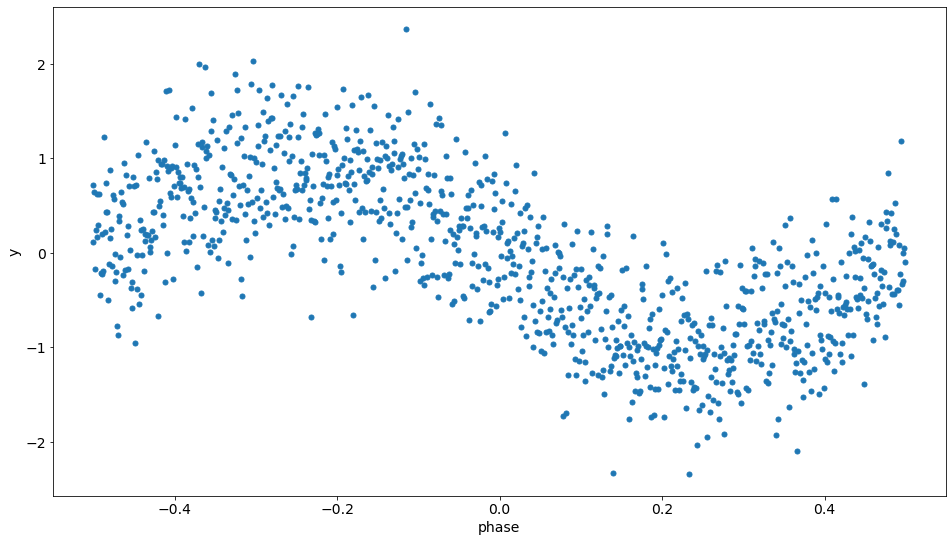

In [28]:
period = 2*np.pi
phases = al.Data_LuSt.fold(time, period)
fig, axs = al.Plot_LuSt.plot_ax(xvals=[[phases]], yvals=[[y]], xlabs=["phase"])
plt.show()

### periodic_shift

--> Started periodic_shift at time 2021-10-25 20:46:31.102695
--> Time needed for periodic_shift: 0:00:00.001986
--> Finished periodic_shift at time 2021-10-25 20:46:31.104681


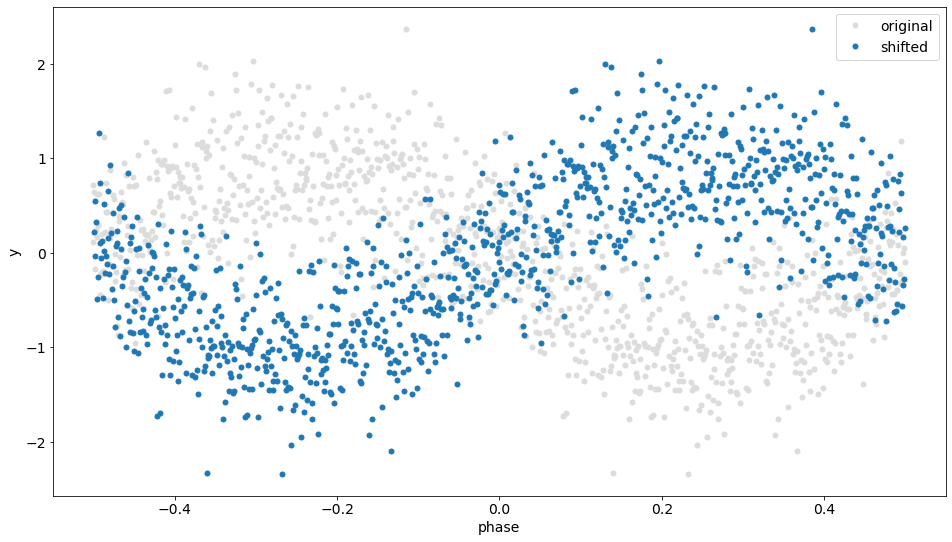

In [29]:
import numpy as np

input_array = phases
shift = 0.5
borders = [-0.5, 0.5]
shifted = al.Data_LuSt.periodic_shift(input_array, shift, borders, timeit=True, testplot=False, verbose=False)
fig, axs = al.Plot_LuSt.plot_ax([[phases, shifted]], [[y, y]], colors=[["gainsboro", "tab:blue"]], labels=[["original", "shifted"]], xlabs=["phase"], axlegend=True)

### phase2time
Convert an array of phases to the corresponding times

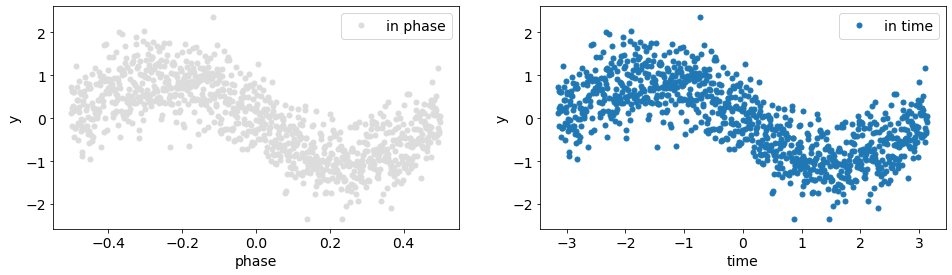

In [30]:
times = al.Data_LuSt.phase2time(phases, period=period)

fig, axs = al.Plot_LuSt.plot_ax([[phases], [times]], [[y], [y]], colors=[["gainsboro"], ["tab:blue"]], labels=[["in phase"], ["in time"]], xlabs=["phase", "time"], axlegend=True)

### phase_binning
phase bin timeseries to 100 representative datapoints (high res on maximum and minimum)

--> Started phase_binning at time 2021-10-25 20:48:46.091580

--------------------------------------------------
 verbose, linspace_def:
 --> Number of iterations         : 38
 --> Shape of combined_linspace   : 51
 --> Desired shape                : 51
 --> Range of linspace            : [-0.5, 0.498999]
--> Number of cut datapoints: 1
--------------------------------------------------


--------------------------------------------------
 verbose, phase_binning: 
 --> requested shape            : 50
 --> shape of binned phases     : 50
 --> shape of binned fluxes     : 50
 --> shape of binned flux errors: 50
 --> shape of intervals used    : 51
 --------------------------------------------------

--> Time needed for phase_binning: 0:00:00.046038
--> Finished phase_binning at time 2021-10-25 20:48:46.137618


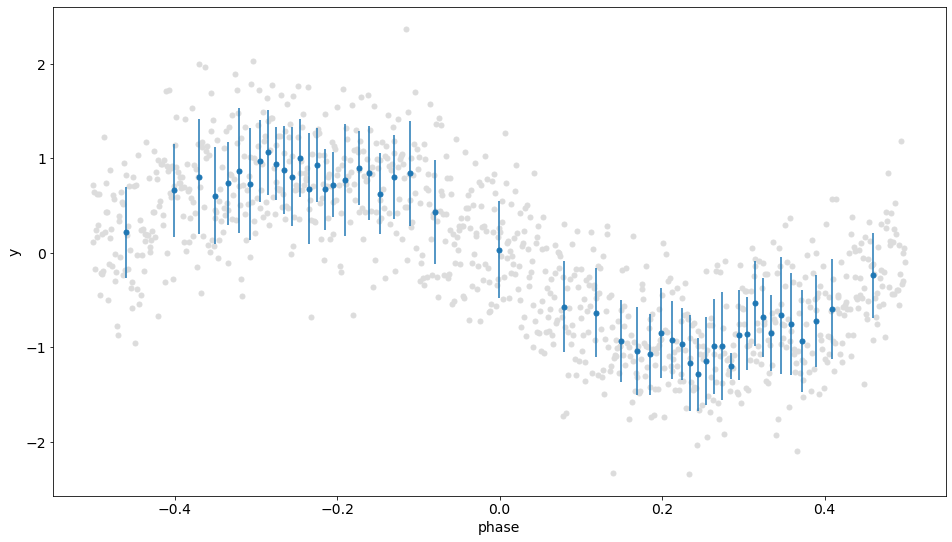

In [32]:
nintervals = 25
nbins = 50
centers = [-0.25, 0.25]
widths = [0.15, 0.15]
spreads = [0.75,0.75]
phases_mean, fluxes_mean, fluxes_sigm, intervals = al.Data_LuSt.phase_binning(fluxes=y, phases=phases, nbins=nbins, nintervals=nintervals, centers=centers, widths=widths, spreads=spreads,
                                                                              go_exact=True, verbose=True, testplot=False, timeit=True)

fig, axs = al.Plot_LuSt.plot_ax([[phases, phases_mean]], [[y, fluxes_mean]], yerrs=[[None, fluxes_sigm]],
                     colors=[["gainsboro", "tab:blue"]], zorders=[[1,3]],
                     xlabs=["phase"])

### sigma_clipping
cut all datapoints above clip_value_top and below clip_value_bottom

--> Started sigma_clipping at time 2021-10-25 20:48:58.029340
--> Time needed for sigma_clipping: 0:00:00.006565
--> Finished sigma_clipping at time 2021-10-25 20:48:58.035905


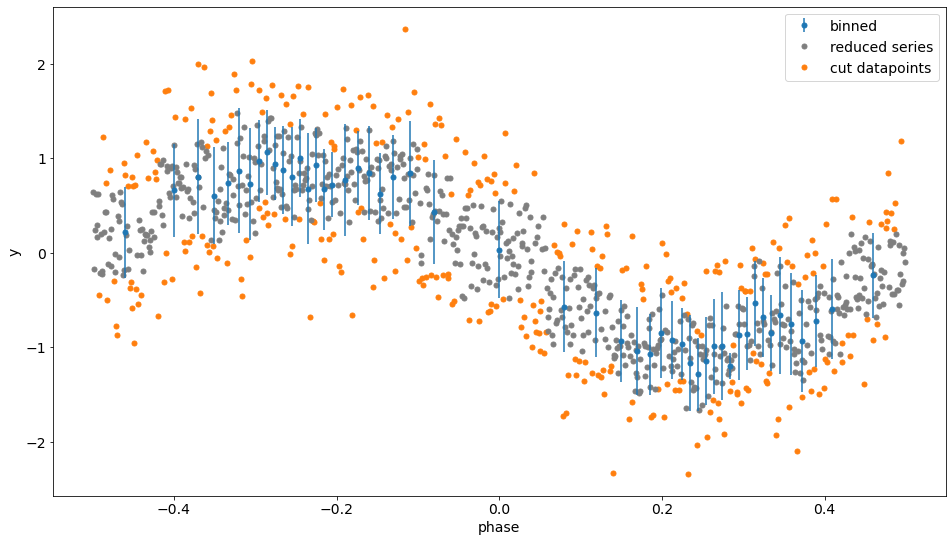

In [33]:
clip_value_top = 1*fluxes_sigm
clip_value_bottom = 1*fluxes_sigm

fluxes_sigcut, phases_sigcut, times_sigcut, cut_f, cut_p, cut_t = al.Data_LuSt.sigma_clipping(fluxes=y, fluxes_mean=fluxes_mean, phases=phases, phases_mean=phases_mean,
                                                                                              intervals=intervals, clip_value_top=clip_value_top, clip_value_bottom=clip_value_bottom, times=time, timeit=True)

fig, axs = al.Plot_LuSt.plot_ax(xvals=[[phases_mean, phases_sigcut, cut_p]], yvals=[[fluxes_mean, fluxes_sigcut, cut_f]],
                                yerrs=[[fluxes_sigm, None, None]], errcolors=[["tab:blue", "tab:grey", "tab:orange"]],
                                colors=[["tab:blue", "tab:grey", "tab:orange"]],
                                labels=[["binned", "reduced series", "cut datapoints"]], axlegend=True,
                                xlabs=["phase"],
                                zorders=[[3,2,1]])